In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
from pathlib import Path

In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
# 1. Create a DataFrame for the 2016 and 2020 election data. 
file_to_open = ("/Users/sarahdivakarla/git/GoVote/voter_final.csv")
voter_df = pd.read_csv(file_to_open,  encoding="ISO-8859-1")
voter_df.head()

,Voter_ID,Birth_Year,City,Zip_Code,Party,Registration_Date,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,Generational_Group
0,704844,1959,SEVEN HILLS,44131,NOPTY,1/1/1901,0,t,D,t,Boomers
1,1658758,1968,PARMA,44130,REP,9/9/1996,0,t,R,t,Generation X
2,2005536,1976,BROADVIEW HTS,44147,REP,3/8/2004,0,t,R,t,Generation X
3,2465762,1991,SOLON,44139,NOPTY,9/27/2010,0,f,0,f,Millennials
4,710633,1968,INDEPENDENCE,44131,REP,1/1/1901,0,t,R,t,Generation X


In [5]:
#Replace True and False Values with 0 and 1
voter_df.replace(('f', 't'), (0, 1), inplace=True)

In [6]:
# Set voter_id_org column as index
voter_df= voter_df.set_index('Voter_ID')

In [7]:
party={"D": 0, "R": 1, "L": 2, "0": 3, "N": 3, " ": 3, "G": 4, "X": 3}
voter_df['2016_Primary_Election'] = voter_df['2016_Primary_Election'].apply(lambda x:party[x])
voter_df['2020_Primary_Election'] = voter_df['2020_Primary_Election'].apply(lambda x:party[x])


In [8]:
# Handle Categorical "Party" columns
P_ID = {"DEM": 0, "REP": 1,"LIB": 2, "NOPTY": 3, "GRE": 4}
voter_df["Party"] = voter_df["Party"].apply(lambda x:P_ID[x])

In [9]:
group = {"Silent": 1,"Boomers": 2, "Generation X": 3, "Millennials": 4, "Generation Z": 5}
voter_df["Generational_Group"] = voter_df["Generational_Group"].apply(lambda x:group[x])

In [10]:
# Code the cities to unique #s
cities = {'SEVEN HILLS': 1, 'PARMA': 2, 'BROADVIEW HTS': 3, 'SOLON': 4, 'INDEPENDENCE': 5,
       'EUCLID': 6, 'CLEVELAND HTS': 7, 'GARFIELD HTS': 8, 'CLEVELAND': 9,
       'ROCKY RIVER': 10, 'WESTLAKE': 11, 'ORANGE': 12, 'PEPPER PIKE':13, 'MAPLE HTS':14,
       'EAST CLEVELAND':15, 'BROOK PARK':16, 'NORTH ROYALTON':17, 'HIGHLAND HTS':18,
       'WARRENSVILLE HTS':19, 'FAIRVIEW PARK':20, 'SOUTH EUCLID':21, 'BEREA':22,
       'MIDDLEBURG HTS':23, 'LAKEWOOD':24, 'LYNDHURST':25, 'SHAKER HTS':25,
       'BROOKLYN':27, 'OLMSTED FALLS':28, 'UNIVERSITY HTS':29, 'GATES MILLS':30,
       'MAYFIELD HTS':31, 'PARMA HTS':32, 'BEACHWOOD':33, 'RICHMOND HTS':33,
       'BRECKSVILLE':34, 'BEDFORD':35, 'BEDFORD HTS':36, 'OAKWOOD':37,
       'NORTH OLMSTED':38, 'OLMSTED TWP':39, 'STRONGSVILLE':40, 'BROOKLYN HTS':41,
       'NEWBURGH HTS':42, 'BAY VILLAGE':43, 'MORELAND HILLS':44, 'WALTON HILLS':45,
       'CUYAHOGA HTS':46, 'VALLEY VIEW':47, 'MAYFIELD VILLAGE':48, 'BENTLEYVILLE':49,
       'GLENWILLOW':50, 'CHAGRIN FALLS':51, 'HUNTING VALLEY':52, 'BRATENAHL':53,
       'WOODMERE':54, 'HIGHLAND HILLS':55, 'NORTH RANDALL':56, 'LINNDALE': 57,
       'CHAGRIN FALLS TWP': 58}

voter_df["City"] = voter_df["City"].apply(lambda x:cities[x])

In [11]:
voter_df['Registration_Date'] =  pd.to_datetime(voter_df['Registration_Date'], dayfirst=True)


In [12]:
voter_df.head()

,Birth_Year,City,Zip_Code,Party,Registration_Date,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,Generational_Group
Voter_ID,,,,,,,,,,
704844,1959,1,44131,3,1901-01-01,3,1,0,1,2
1658758,1968,2,44130,1,1996-09-09,3,1,1,1,3
2005536,1976,3,44147,1,2004-08-03,3,1,1,1,3
2465762,1991,4,44139,3,2010-09-27,3,0,3,0,4
710633,1968,5,44131,1,1901-01-01,3,1,1,1,3


In [13]:
voter_df.to_csv('/Users/sarahdivakarla/git/GoVote/2016_2020_cleaned.csv')

In [14]:
corr_matrix = voter_df.corr()
corr_matrix['2020_General_Election'].sort_values(ascending=False)

2020_General_Election    1.000000
2016_General_Election    0.434672
City                     0.112302
Zip_Code                 0.054198
Generational_Group      -0.275442
Birth_Year              -0.285664
2020_Primary_Election   -0.309675
2016_Primary_Election   -0.337739
Party                   -0.392269
Name: 2020_General_Election, dtype: float64

In [15]:
# Restrict to voters eligable to vote in 2016 and 2020 election (born 1998 or before)
voter_2016 = voter_df[voter_df['Birth_Year'] <= 1998]

In [16]:
voter_2016 = voter_2016[voter_2016['Registration_Date'] <= '2016-10-05']

In [17]:
voter_2016.to_csv('/Users/sarahdivakarla/git/GoVote/voter_2016cleaned.csv')

In [18]:
voter_2016cleaned = voter_2016.drop(['Registration_Date'], axis=1)


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings(action='ignore')

In [66]:
classifier = GradientBoostingClassifier(n_estimators=80, min_samples_split=500,
                        min_samples_leaf=50,max_depth=5,max_features='sqrt', subsample=0.8,random_state=33, 
                        learning_rate=.5)



In [67]:
x = voter_2016cleaned.drop("2020_General_Election",axis=1)
y = voter_2016cleaned["2020_General_Election"]

In [68]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 33)

classifier.fit(X_train,Y_train)


from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X_train, Y_train,cv=5,
scoring="accuracy").mean()

In [71]:
score 


0.838433326740514

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.8381725175165259


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)

[[16720 11273]
 [ 6696 76349]]


In [75]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.60      0.65     27993
           1       0.87      0.92      0.89     83045

    accuracy                           0.84    111038
   macro avg       0.79      0.76      0.77    111038
weighted avg       0.83      0.84      0.83    111038



In [76]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [78]:
classifier = GradientBoostingClassifier(n_estimators=80, min_samples_split=500,
                        min_samples_leaf=50,max_depth=5,max_features='sqrt', subsample=0.8,random_state=33, 
                        learning_rate=.5)
# Fit the model
#
classifier.fit(X_train_std, Y_train)
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % classifier.score(X_test_std, Y_test))
#
# Create the mean squared error
#
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, classifier.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.838
The mean squared error (MSE) on test set: 0.1618


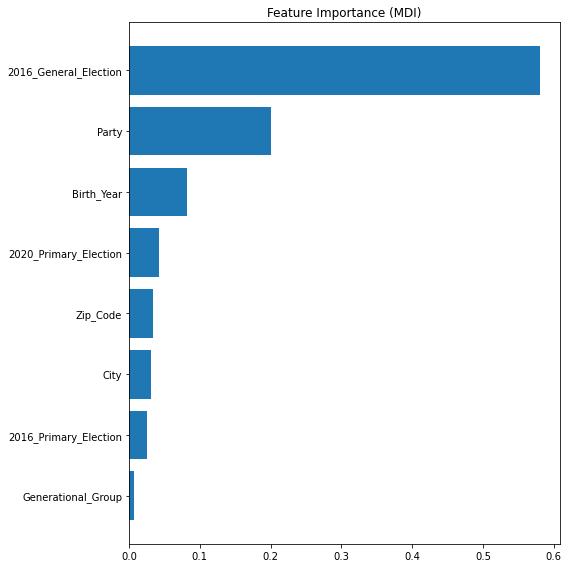

In [81]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(classifier, X_test_std, Y_test, n_repeats=10,
                                random_state=33, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression()

In [55]:
logclassifier.fit(X_train, Y_train)

LogisticRegression()

In [56]:
y_pred = logclassifier.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.8022478791044507


In [61]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100]
    }
]

In [62]:
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings(action='ignore')
logclf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [63]:
best_clf = logclf.fit(x,y)


Fitting 3 folds for each of 400 candidates, totalling 1200 fits


/Users/sarahdivakarla/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sarahdivakarla/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sarahdivakarla/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sarahdivakarla/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

In [64]:
logclf.score(X_train, Y_train)

0.8345990440188135

In [65]:
logclf.score(X_test, Y_test)

0.8325528197553991

In [70]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.52      0.57     27993
           1       0.85      0.90      0.87     83045

    accuracy                           0.80    111038
   macro avg       0.74      0.71      0.72    111038
weighted avg       0.79      0.80      0.80    111038

